In [38]:
import pandas as pd
import os

In [2]:
hr_info = pd.read_csv("./data/hr-info.csv",encoding = 'euc-kr')

In [18]:
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [15]:
#남여 비율 계산
float(hr_info['GENDER'].value_counts()["M"]/hr_info['GENDER'].count()),float(hr_info['GENDER'].value_counts()["F"]/hr_info['GENDER'].count())

(0.585, 0.415)

In [17]:
hr_info['GENDER'].value_counts()/hr_info['GENDER'].count()*100

GENDER
M    58.5
F    41.5
Name: count, dtype: float64

In [19]:
hr_info['EDU_LEVEL'].value_counts()

EDU_LEVEL
학사 학위      159
석사 학위       17
박사 학위       12
고등학교 졸업     10
전문대 학위       2
Name: count, dtype: int64

In [20]:
hr_info['AGE'].value_counts()

AGE
29    26
30    18
26    13
28    13
27    12
24    11
22    10
31    10
38     9
37     8
35     8
36     8
48     8
25     7
23     6
39     6
40     6
41     6
42     6
47     5
32     2
49     2
Name: count, dtype: int64

### 카테고리 구분

| 나이 | 1~15| 16~25 | 26~35 | 36~60 | 61~99 |
|------|------|------|------|------|------|
| 구분 | 미성년자 | 청년| 중년| 장년| 노년|  

- cut함수 사용

In [21]:
labels = ['20대','30대','40대']
bins = [19,29,39,49]
# labels보다 bins가 값이 한개 더 많아야 함

In [22]:
cats = pd.cut(hr_info['AGE'],bins,labels = labels)
cats

0      40대
1      40대
2      40대
3      40대
4      40대
      ... 
195    20대
196    20대
197    20대
198    20대
199    20대
Name: AGE, Length: 200, dtype: category
Categories (3, object): ['20대' < '30대' < '40대']

In [23]:
hr_info.insert(loc = 6,column = 'AGE_Cat', value = cats)

In [24]:
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,AGE_Cat,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,...,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,40대,25,박사 학위,4.50,...,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,40대,24,박사 학위,4.60,...,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,40대,22,박사 학위,4.60,...,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,40대,18,박사 학위,3.51,...,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,40대,19,박사 학위,3.38,...,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,20대,0,학사 학위,0.00,...,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,20대,0,학사 학위,0.00,...,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,20대,0,학사 학위,0.00,...,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,20대,0,학사 학위,0.00,...,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [25]:
# 나이대별 비율 구하기
hr_info['AGE_Cat'].value_counts()/hr_info['AGE_Cat'].count()*100

AGE_Cat
20대    49.0
30대    34.5
40대    16.5
Name: count, dtype: float64

In [34]:
hr_info['AGE_Cat'].value_counts('T')*100 # normalize 매개변수에 어떤값을 넣어도 비율계산이 가능함!

AGE_Cat
20대    49.0
30대    34.5
40대    16.5
Name: proportion, dtype: float64

### 실습 

- 2015~2017년 광주광역시 범죄현황 데이터를 활용해 

In [41]:
filename = os.listdir('./data/crime/')

In [42]:
crime_list = []

for file in filename:
    df = pd.read_csv("./data/crime/"+file,encoding = 'euc-kr')
    crime_list.append(df)

In [43]:
crime_list

[         관서명    구분  살인  강도  강간·강제추행    절도     폭력
 0   광주지방경찰청계  발생건수  18  44      750  8425   9593
 1   광주지방경찰청계  검거건수  18  47      758  5409   8301
 2   광주지방경찰청계  검거인원  17  66      776  3433  11774
 3   광주지방경찰청계    구속   9  33       42   104     58
 4   광주지방경찰청계   불구속   1  26      511  2781   5618
 5   광주지방경찰청계    기타   7   7      223   548   6098
 6    광주동부경찰서  발생건수   3   5       92  1100   1155
 7    광주동부경찰서  검거건수   4   6       86   583    970
 8    광주동부경찰서  검거인원   4   7       98   447   1483
 9    광주동부경찰서    구속   3   2        8    13     10
 10   광주동부경찰서   불구속   0   4       63   379    703
 11   광주동부경찰서    기타   1   1       27    55    770
 12   광주서부경찰서  발생건수   5  10      172  2050   2483
 13   광주서부경찰서  검거건수   4   8      153  1471   2124
 14   광주서부경찰서  검거인원   4  15      167   876   3080
 15   광주서부경찰서    구속   3  10        7    27     19
 16   광주서부경찰서   불구속   0   5       91   665   1366
 17   광주서부경찰서    기타   1   0       69   184   1695
 18   광주남부경찰서  발생건수   1   3       70   962   1081


In [46]:
total_df = pd.concat(crime_list,axis=1)

In [47]:
total_df.to_csv("./data/total_crime_info.csv",index = False) 

In [48]:
pd.read_csv("./data/total_crime_info.csv",index_col="관서명")

,구분,살인,강도,강간·강제추행,절도,폭력,관서명.1,구분.1,살인.1,강도.1,강간·강제추행.1,절도.1,폭력.1,관서명.2,구분.2,살인.2,강도.2,강간·강제추행.2,절도.2,폭력.2
관서명,,,,,,,,,,,,,,,,,,,,
광주지방경찰청계,발생건수,18.0,44.0,750.0,8425.0,9593.0,광주지방경찰청계,발생건수,17.0,47.0,701.0,6052.0,8599.0,광주지방경찰청계,발생건수,9,33,725,4816,8366
광주지방경찰청계,검거건수,18.0,47.0,758.0,5409.0,8301.0,광주지방경찰청계,검거건수,18.0,47.0,713.0,4242.0,7631.0,광주지방경찰청계,검거건수,9,32,732,3487,7553
광주지방경찰청계,검거인원,17.0,66.0,776.0,3433.0,11774.0,광주지방경찰청계,검거인원,21.0,54.0,758.0,3455.0,10747.0,광주지방경찰청계,검거인원,10,61,824,3046,11018
광주지방경찰청계,구속,9.0,33.0,42.0,104.0,58.0,광주지방경찰청계,구속,14.0,25.0,37.0,132.0,57.0,광주지방경찰청계,구속,8,28,71,115,88
광주지방경찰청계,불구속,1.0,26.0,511.0,2781.0,5618.0,광주지방경찰청계,불구속,3.0,25.0,491.0,2862.0,5267.0,광주지방경찰청계,불구속,0,26,523,2493,5235
광주지방경찰청계,기타,7.0,7.0,223.0,548.0,6098.0,광주지방경찰청계,기타,4.0,4.0,230.0,461.0,5423.0,광주지방경찰청계,기타,2,7,230,438,5695
광주동부경찰서,발생건수,3.0,5.0,92.0,1100.0,1155.0,광주동부경찰서,발생건수,3.0,8.0,83.0,832.0,1142.0,광주지방경찰청,발생건수,0,0,0,0,0
광주동부경찰서,검거건수,4.0,6.0,86.0,583.0,970.0,광주동부경찰서,검거건수,3.0,7.0,70.0,679.0,1002.0,광주지방경찰청,검거건수,0,1,91,0,37
광주동부경찰서,검거인원,4.0,7.0,98.0,447.0,1483.0,광주동부경찰서,검거인원,4.0,10.0,71.0,543.0,1497.0,광주지방경찰청,검거인원,0,1,105,0,149


In [49]:
pd.concat(crime_list)

,관서명,구분,살인,강도,강간·강제추행,절도,폭력
0,광주지방경찰청계,발생건수,18,44,750,8425,9593
1,광주지방경찰청계,검거건수,18,47,758,5409,8301
2,광주지방경찰청계,검거인원,17,66,776,3433,11774
3,광주지방경찰청계,구속,9,33,42,104,58
4,광주지방경찰청계,불구속,1,26,511,2781,5618
...,...,...,...,...,...,...,...
37,광주광산경찰서,검거건수,3,10,144,660,1702
38,광주광산경찰서,검거인원,3,22,148,594,2390
39,광주광산경찰서,구속,3,11,6,25,18
40,광주광산경찰서,불구속,0,7,102,515,1104


### 내 코드 

In [164]:
crime_2015 = pd.read_csv("./data/crime/2015.csv",encoding='euc-kr',index_col = "관서명")
crime_2016 = pd.read_csv("./data/crime/2016.csv",encoding='euc-kr',index_col = "관서명")
crime_2017 = pd.read_csv("./data/crime/2017.csv",encoding='euc-kr',index_col = "관서명")

In [257]:
crime_2015[crime_2015['구분'] == "발생건수"]

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주동부경찰서,발생건수,3,5,92,1100,1155
광주서부경찰서,발생건수,5,10,172,2050,2483
광주남부경찰서,발생건수,1,3,70,962,1081
광주북부경찰서,발생건수,5,14,256,2570,2621
광주광산경찰서,발생건수,4,12,160,1743,2253


In [256]:
crime_2015[crime_2015['구분'] == "발생건수"].iloc[:,1:].groupby(["관서명"]).sum()

,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,
광주광산경찰서,4,12,160,1743,2253
광주남부경찰서,1,3,70,962,1081
광주동부경찰서,3,5,92,1100,1155
광주북부경찰서,5,14,256,2570,2621
광주서부경찰서,5,10,172,2050,2483
광주지방경찰청계,18,44,750,8425,9593


In [255]:
crime_2015[crime_2015['구분'] == "발생건수"][1:].groupby(['관서명','구분']).sum()

,,살인,강도,강간·강제추행,절도,폭력
관서명,구분,,,,,
광주광산경찰서,발생건수,4,12,160,1743,2253
광주남부경찰서,발생건수,1,3,70,962,1081
광주동부경찰서,발생건수,3,5,92,1100,1155
광주북부경찰서,발생건수,5,14,256,2570,2621
광주서부경찰서,발생건수,5,10,172,2050,2483


In [ ]:
crime_2015[crime_2015['구분'] == "발생건수"]

In [136]:
crime_2015[crime_2015['구분'] == "발생건수"].groupby(['관서명']).sum()

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주광산경찰서,발생건수,4,12,160,1743,2253
광주남부경찰서,발생건수,1,3,70,962,1081
광주동부경찰서,발생건수,3,5,92,1100,1155
광주북부경찰서,발생건수,5,14,256,2570,2621
광주서부경찰서,발생건수,5,10,172,2050,2483
광주지방경찰청계,발생건수,18,44,750,8425,9593


In [140]:
crime_b = crime_2015[crime_2015['구분'] == "발생건수"]
crime_b

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주동부경찰서,발생건수,3,5,92,1100,1155
광주서부경찰서,발생건수,5,10,172,2050,2483
광주남부경찰서,발생건수,1,3,70,962,1081
광주북부경찰서,발생건수,5,14,256,2570,2621
광주광산경찰서,발생건수,4,12,160,1743,2253


In [199]:
crime_b.groupby(['관서명']).sum()

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주광산경찰서,발생건수,4,12,160,1743,2253
광주남부경찰서,발생건수,1,3,70,962,1081
광주동부경찰서,발생건수,3,5,92,1100,1155
광주북부경찰서,발생건수,5,14,256,2570,2621
광주서부경찰서,발생건수,5,10,172,2050,2483
광주지방경찰청계,발생건수,18,44,750,8425,9593


In [189]:
crime_2015[crime_2015['구분'] == "발생건수"].iloc[:,1:]

,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,
광주지방경찰청계,18,44,750,8425,9593
광주동부경찰서,3,5,92,1100,1155
광주서부경찰서,5,10,172,2050,2483
광주남부경찰서,1,3,70,962,1081
광주북부경찰서,5,14,256,2570,2621
광주광산경찰서,4,12,160,1743,2253


In [160]:
crime_2015_b = crime_2015[crime_2015['구분'] == "발생건수"].iloc[:,1:].apply(sum,axis=1)

- 굳이 apply 함수를 사용하지 않아도, 바로 axis=1로 적용해서 작성하면 된다. > 이게 더 좋은 코드인듯.
```
crime_2015[crime_2015['구분'] == "발생건수"].iloc[:,1:].sum(axis=1)
```

In [166]:
crime_2016_b = crime_2016[crime_2016['구분'] == "발생건수"].iloc[:,1:].apply(sum,axis=1)

In [167]:
crime_2017_b = crime_2017[crime_2017['구분'] == "발생건수"].iloc[:,1:].apply(sum,axis=1)

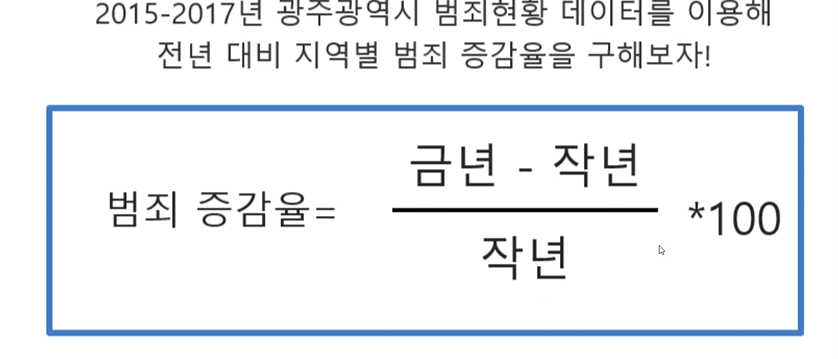

In [170]:
crime_2015_2016 = (crime_2016_b - crime_2015_b)/crime_2015_b*100

In [169]:
crime_2016_2017 = (crime_2017_b - crime_2016_b)/crime_2016_b*100

In [232]:
crime_2016_2017

관서명
광주광산경찰서    -12.285797
광주남부경찰서    -17.050938
광주동부경찰서    -13.007737
광주북부경찰서     -4.893925
광주서부경찰서     -6.526208
광주지방경찰청           NaN
광주지방경찰청계    -9.516087
dtype: float64

In [183]:
result = pd.concat([crime_2015_b,crime_2015_2016,crime_2016_b,crime_2016_2017,crime_2017_b],axis=1)

In [185]:
result.drop("광주지방경찰청",axis=0,inplace=True) # 축설정안해도 됨 > 어차피 행을 지울거라

In [187]:
result.columns = ["2015총계","2015-2016 증감율","2016총계","2016-2017 증감율","2017총계"]
result

,2015총계,2015-2016 증감율,2016총계,2016-2017 증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830.0,-18.130643,15416.0,-9.516087,13949
광주동부경찰서,2355.0,-12.186837,2068.0,-13.007737,1799
광주서부경찰서,4720.0,-17.542373,3892.0,-6.526208,3638
광주남부경찰서,2117.0,-11.903637,1865.0,-17.050938,1547
광주북부경찰서,5466.0,-24.112697,4148.0,-4.893925,3945
광주광산경찰서,4172.0,-17.473634,3443.0,-12.285797,3020


- 우선 sum을 어떤식으로 구성할지를 생각해내기가 어려웠다.
- groupby를 적용해서 관서명 별 총합계를 구하려 했는데, 그게 불가능했다.
- 그래서iloc을 활용해서 수치인 값들만 인덱싱 한뒤, apply함수를 적용해서 axis = 1로 적용한 뒤sum을 구했다.
- 그래서 모두 한꺼번에 구한 후, concat 으로 전부 aixs =1 적용해서 합친다음, column명을 바꿔줬다.
- 처음에는 drop으로 "광주지방경찰청" 행을 삭제 한뒤, columns이름을 다시 지정해줬다.
- 그래서 이번에 join을 통해서 'inner' join으로 합치면 교집합이므로, 더 간결하게 합쳐진다

In [197]:
pd.concat([crime_2015_b,crime_2015_2016,crime_2016_b,crime_2016_2017,crime_2017_b],axis=1,join='inner', keys=["2015총계","2015-2016 증감율","2016총계","2016-2017 증감율","2017총계"])

,2015총계,2015-2016 증감율,2016총계,2016-2017 증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


### 수업코드 

In [234]:
df2015 = pd.read_csv("./data/crime/2015.csv",encoding='euc-kr',index_col = "관서명")
df2016 = pd.read_csv("./data/crime/2016.csv",encoding='euc-kr',index_col = "관서명")
df2017 = pd.read_csv("./data/crime/2017.csv",encoding='euc-kr',index_col = "관서명")

In [245]:
# df2015[df2015['구분']=='발생건수'].sum(axis=1) 

- 구분'컬럼'이 문자열이라 에러 발생

In [258]:
s_2015

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
dtype: int64

In [239]:
s_2015 = df2015[df2015['구분']=='발생건수'].loc[:,'살인':'폭력'].sum(axis=1)
s_2016 = df2016[df2016['구분']=='발생건수'].loc[:,'살인':'폭력'].sum(axis=1)
s_2017 = df2017[df2017['구분']=='발생건수'].loc[:,'살인':'폭력'].sum(axis=1)

In [243]:
s_2015_2016 = (s_2016-s_2015)/s_2015*100
s_2016_2017 = (s_2017-s_2016)/s_2016*100

In [244]:
pd.concat([s_2015,s_2015_2016,s_2016,s_2016_2017,s_2017],axis=1,join = 'inner',keys=["2015총계","2015-2016 증감율","2016총계","2016-2017 증감율","2017총계"])

,2015총계,2015-2016 증감율,2016총계,2016-2017 증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


- 변형(drop 활용해서) 데이터를 다시 만들어도 됨,

In [238]:
df2015_new = df2015[df2015['구분']=='발생건수'].drop("구분",axis=1) # "구분"을 drop해서 활용해도 가능
s_2015 = df2015_new.sum(axis=1)

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
dtype: int64

### groupby활용 

In [259]:
df2015 = pd.read_csv("./data/crime/2015.csv",encoding='euc-kr',index_col = "관서명")
df2016 = pd.read_csv("./data/crime/2016.csv",encoding='euc-kr',index_col = "관서명")
df2017 = pd.read_csv("./data/crime/2017.csv",encoding='euc-kr',index_col = "관서명")

In [268]:
df2015[df2015['구분']=='발생건수'].groupby('관서명')[['살인','강도','강간·강제추행','절도','폭력']].sum().sum(axis=1)

관서명
광주광산경찰서      4172
광주남부경찰서      2117
광주동부경찰서      2355
광주북부경찰서      5466
광주서부경찰서      4720
광주지방경찰청계    18830
dtype: int64

In [274]:
df2015[df2015['구분']=='발생건수']

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주동부경찰서,발생건수,3,5,92,1100,1155
광주서부경찰서,발생건수,5,10,172,2050,2483
광주남부경찰서,발생건수,1,3,70,962,1081
광주북부경찰서,발생건수,5,14,256,2570,2621
광주광산경찰서,발생건수,4,12,160,1743,2253
